In [ ]:
!wget https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py

In [1]:
from inferenceutils import *
import os

labelmap_path = "../model/labelmap.pbtxt"
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'../model/inference_graph/saved_model')
print("Done loading model.")

2022-10-03 15:52:49.916189: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Done loading model.


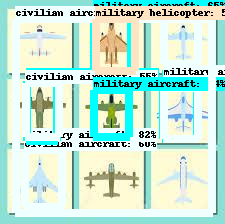

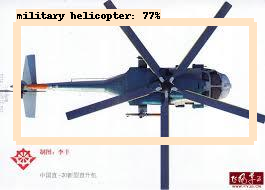

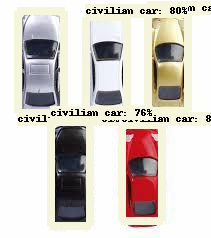

In [9]:
import pandas as pd
test = pd.read_csv('../data/test_labels.csv')
#Getting 3 random images to test
images = test.sample(n=3)["filename"] #['../test.jpg']

for image_name in images:
  
  image_np = load_image_into_numpy_array("../data/images/" + image_name)
  output_dict = run_inference_for_single_image(model, image_np)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      min_score_thresh=0.5, # Minimum score to show the box.
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
    
  im = Image.fromarray(image_np)
  display(im)